In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
     number1 : int
     operation:str
     number2:int
     finalNumber:int

In [3]:
def adder(state  :AgentState) -> AgentState:
    """ This node adds two numnbers together and returns the result """
    
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state  :AgentState) -> AgentState:
    """ This node substracts two numnbers together and returns the result """
    
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state : AgentState) -> AgentState:
    """ This node decides which node to run next (the conditional node) """
    
    if state["operation"] == "+":
        return "addition_operation"

    elif state["operation"] == "-":
        return "subtraction_operation"

In [4]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state : state) # passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge : Node
        "addition_operation" : "add_node",
        "subtraction_operation" : "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()



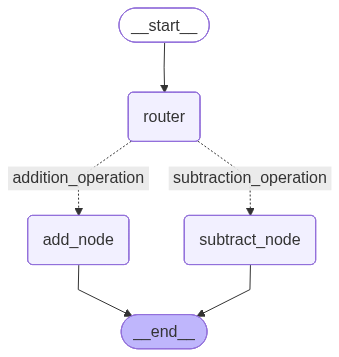

In [5]:
from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
initial_state_1 = AgentState(number1 = 10, operation="-", number2=4)
print(app.invoke(initial_state_1))
initial_state_2 = AgentState(number1 = 10, operation="+", number2=4)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 4, 'finalNumber': 6}
{'number1': 10, 'operation': '-', 'number2': 4, 'finalNumber': 6}
